 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns

whale_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)

In [3]:
# Count nulls

whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls

whale_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns

algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)

In [6]:
# Count nulls

algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls

algo_df.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices

sp_path = Path("Resources/sp500_history.csv")
sp_df = pd.read_csv(sp_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)

In [9]:
# Check Data Types

sp_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types

sp_df["Close"] = sp_df["Close"].str.replace("$","").astype("float")

/var/folders/bl/c2t095fj3z36430_ckzjs_r80000gn/T/ipykernel_60487/407595222.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_df["Close"] = sp_df["Close"].str.replace("$","").astype("float")


In [11]:
# Calculate Daily Returns

sp_daily_returns = sp_df.pct_change()

In [12]:
# Drop nulls

sp_daily_returns.dropna(inplace=True)

In [13]:
# Rename `Close` Column to be specific to this portfolio.

sp_daily_returns.rename(columns={"Close" : "SP500"}, inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_data = pd.concat([whale_df, algo_df, sp_daily_returns], axis="columns", join="inner")

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

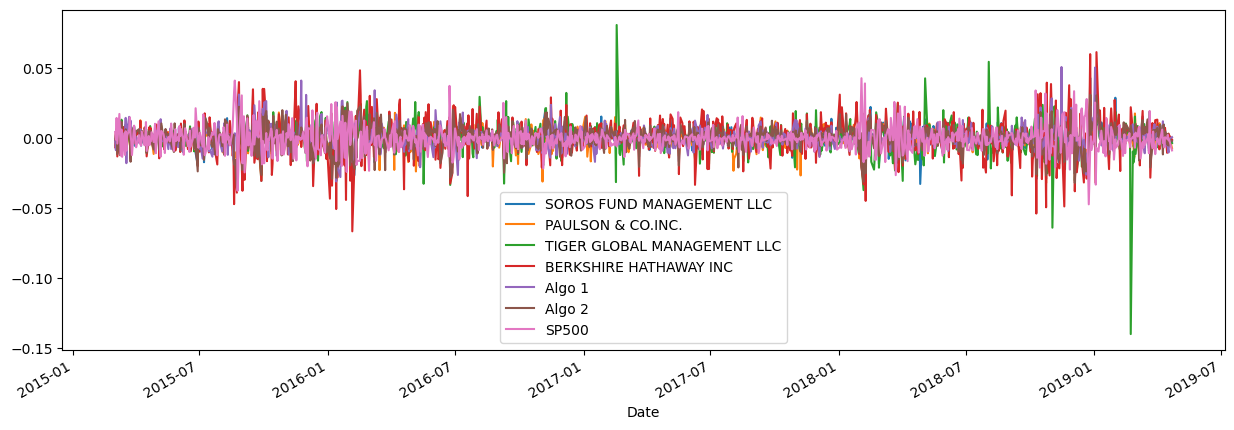

In [15]:
# Plot daily returns of all portfolios

combined_data.plot(figsize =(15,5))

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

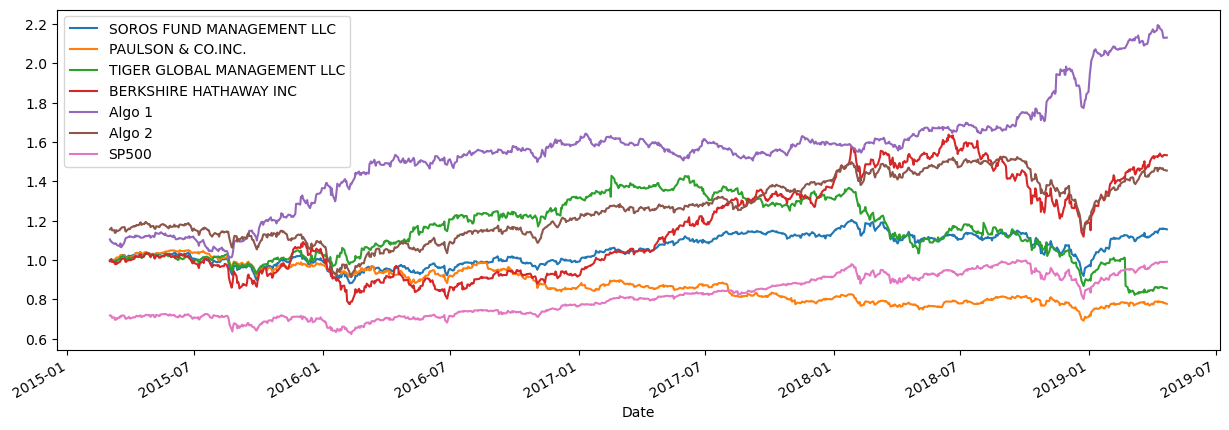

In [16]:
# Calculate cumulative returns of all portfolios

whale_cum_returns = (1 + whale_df).cumprod()
algo_cum_returns = (1 + algo_df).cumprod()
sp_cum_returns = (1 + sp_daily_returns).cumprod()

# Plot cumulative returns

cum_returns = pd.concat([whale_cum_returns, algo_cum_returns, sp_cum_returns], axis="columns", join="inner")

cum_returns.plot(figsize =(15,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

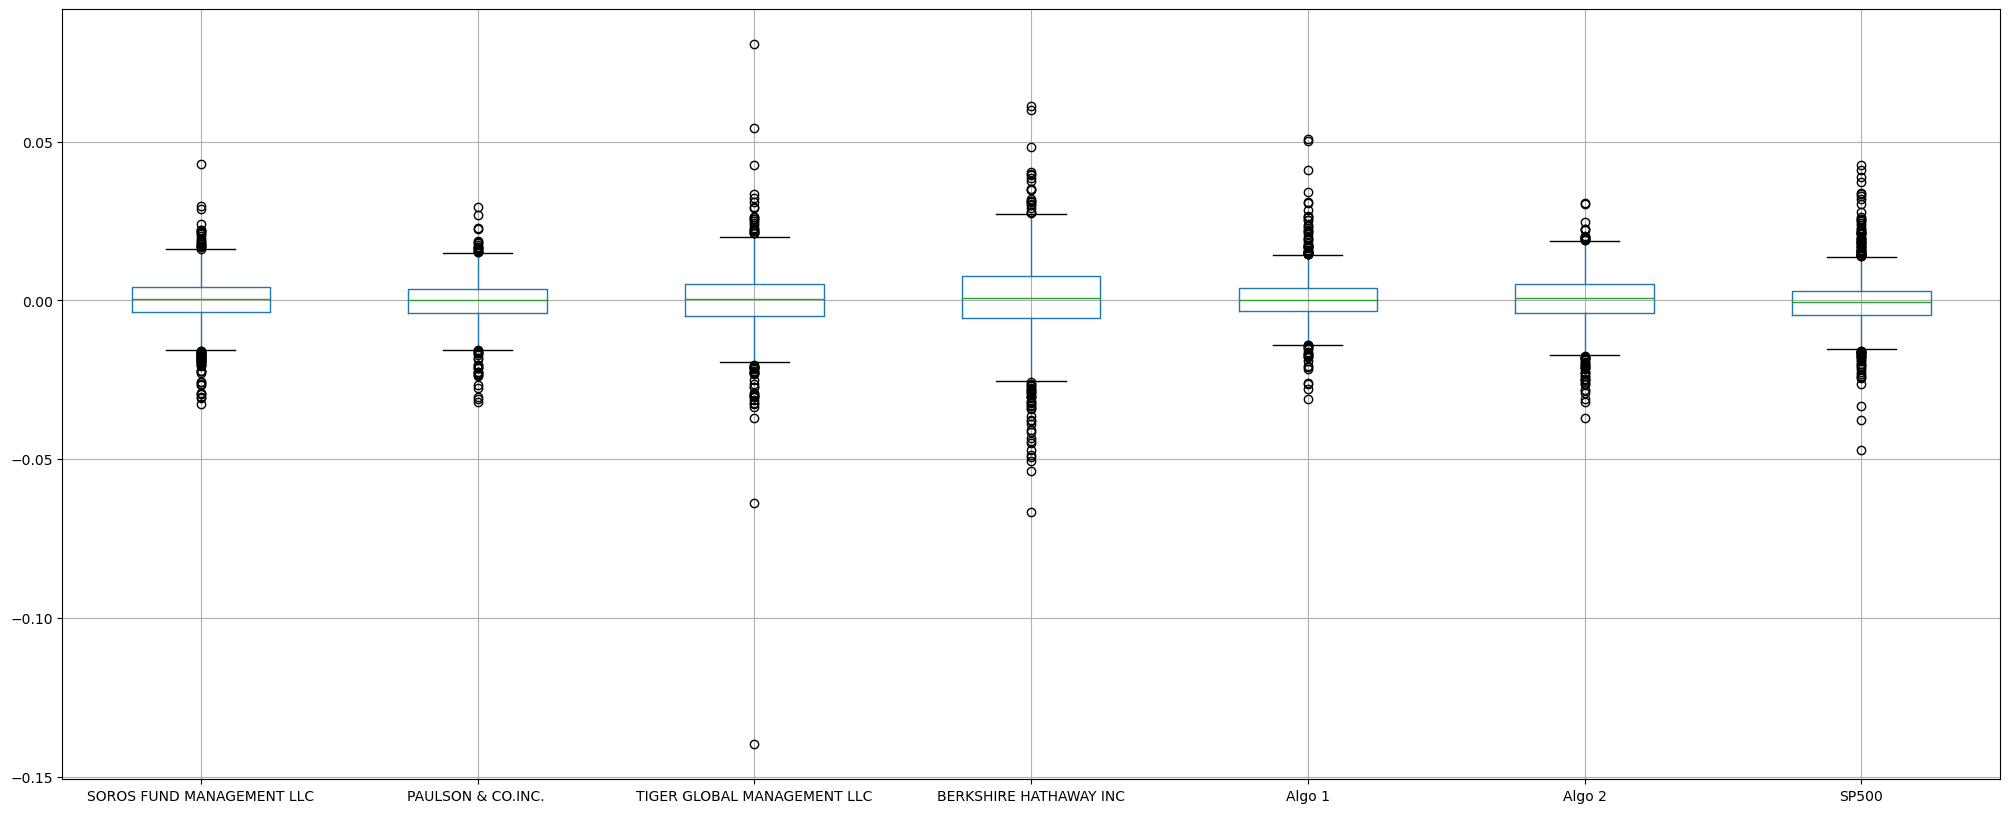

In [17]:
# Box plot to visually show risk

combined_data.boxplot(figsize =(25,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios

combined_std = combined_data.std()
combined_std


SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Determine which portfolios are riskier than the S&P 500 

sp500_std = combined_std["SP500"]

combined_std > sp500_std 


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
dtype: bool

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = combined_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500                          0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

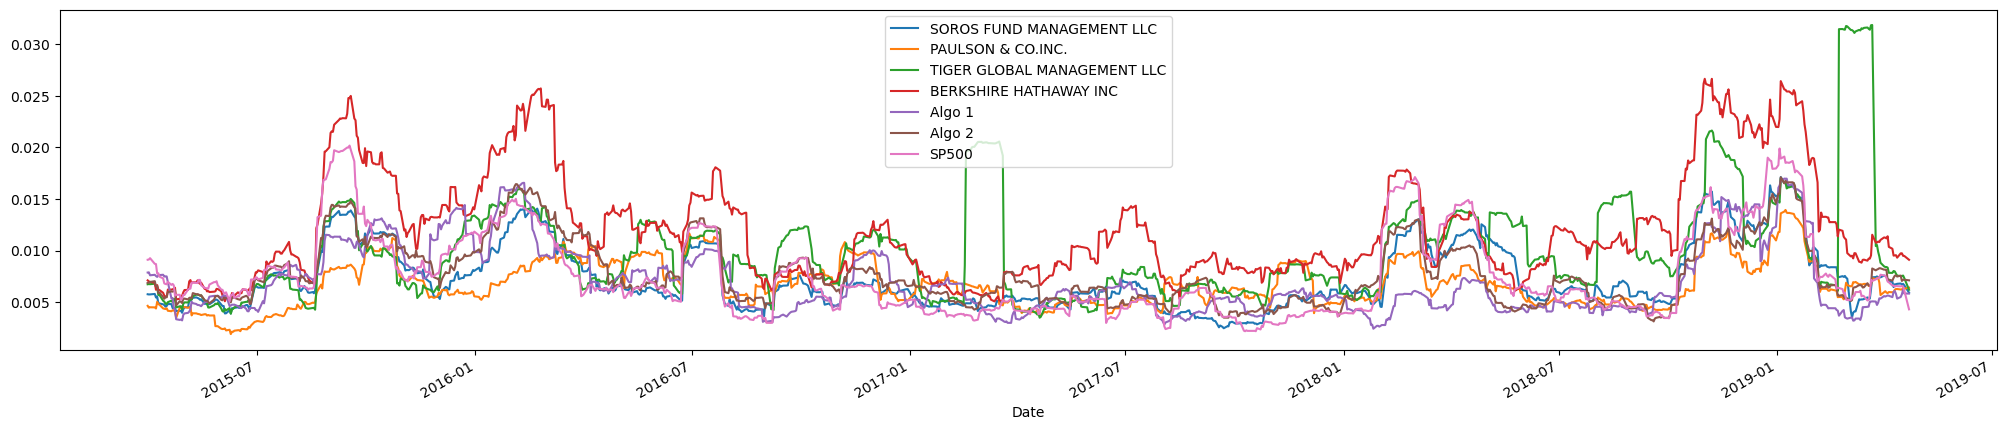

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation

combined_data.rolling(window=21).std().plot(figsize =(25,5))

In [22]:
# Calculate the correlation

# Display de correlation matrix

correlation = combined_data.corr()
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [23]:
# Compare covariance of Algo 2 and SP500

covariance = combined_data["Algo 2"].cov(combined_data["SP500"])
covariance

-1.5699865363012388e-07

In [24]:
# Calculate variance of SP500

variance = combined_data["SP500"].var()
variance

7.373467552840441e-05

In [25]:
# Calculate beta

beta = covariance / variance
beta

-0.0021292377365876402

<Axes: title={'center': 'Rolling 30-Day Beta Trend'}, xlabel='Date'>

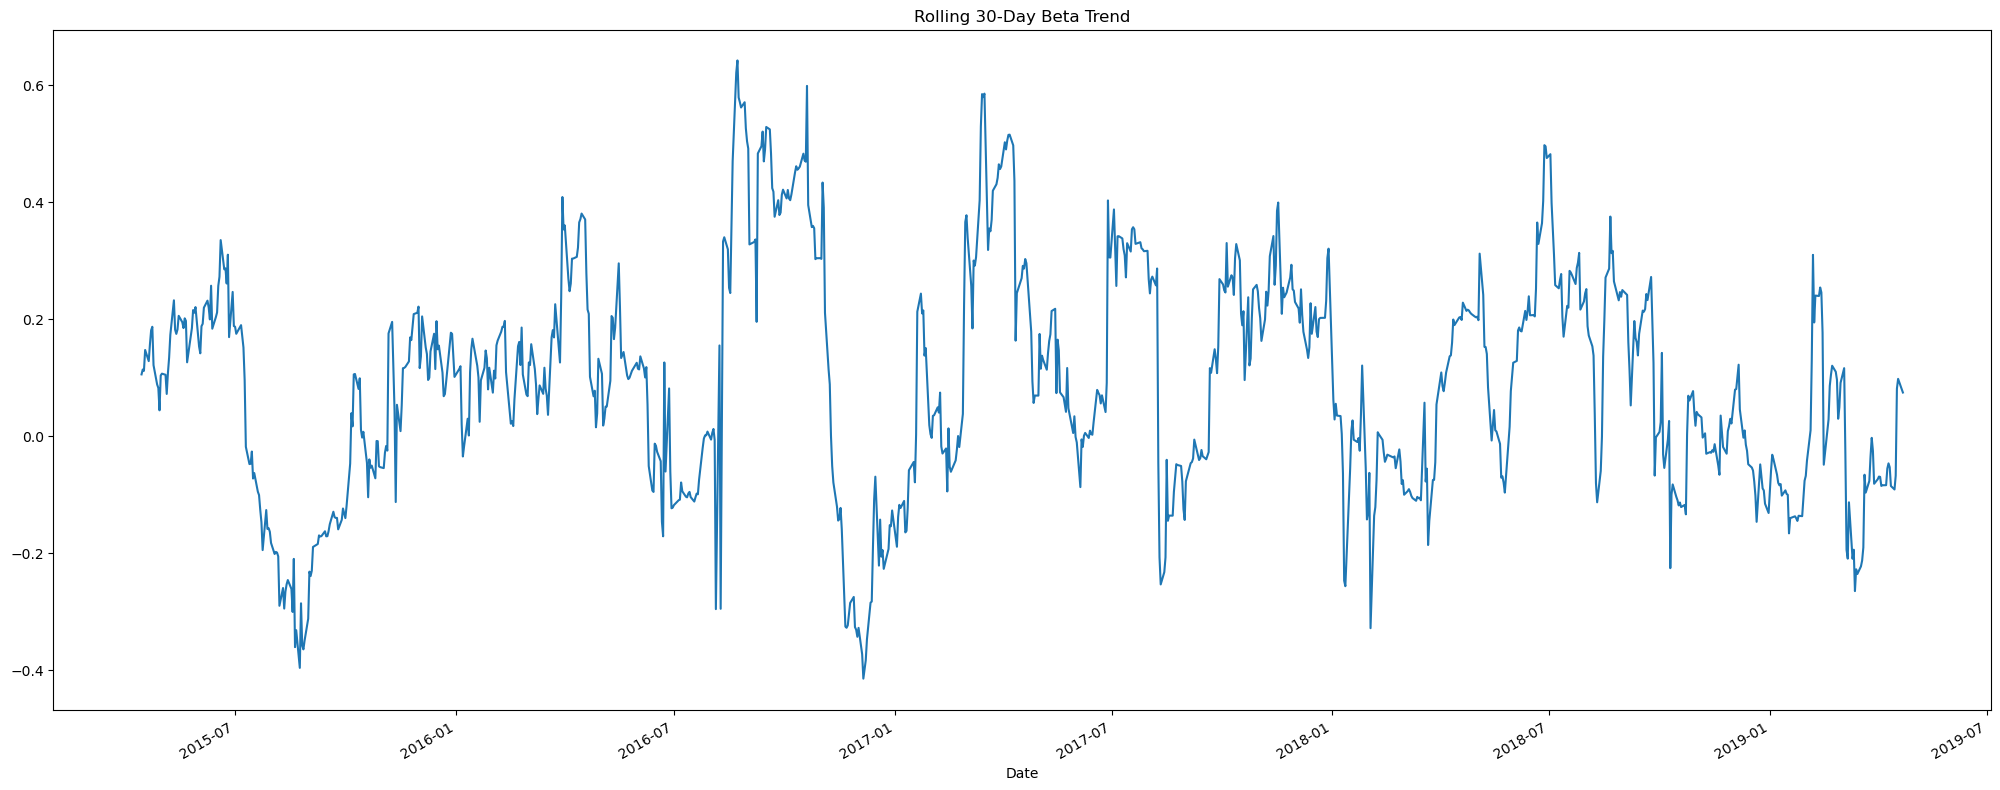

In [26]:
# Plot beta trend over 30 days

rolling_covariance = combined_data["Algo 2"].rolling(window=30).cov(combined_data["SP500"])
rolling_variance = combined_data["SP500"].rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance

rolling_beta.plot(figsize=(25, 10), title= "Rolling 30-Day Beta Trend")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': 'Exponentially Weighted Average'}, xlabel='Date'>

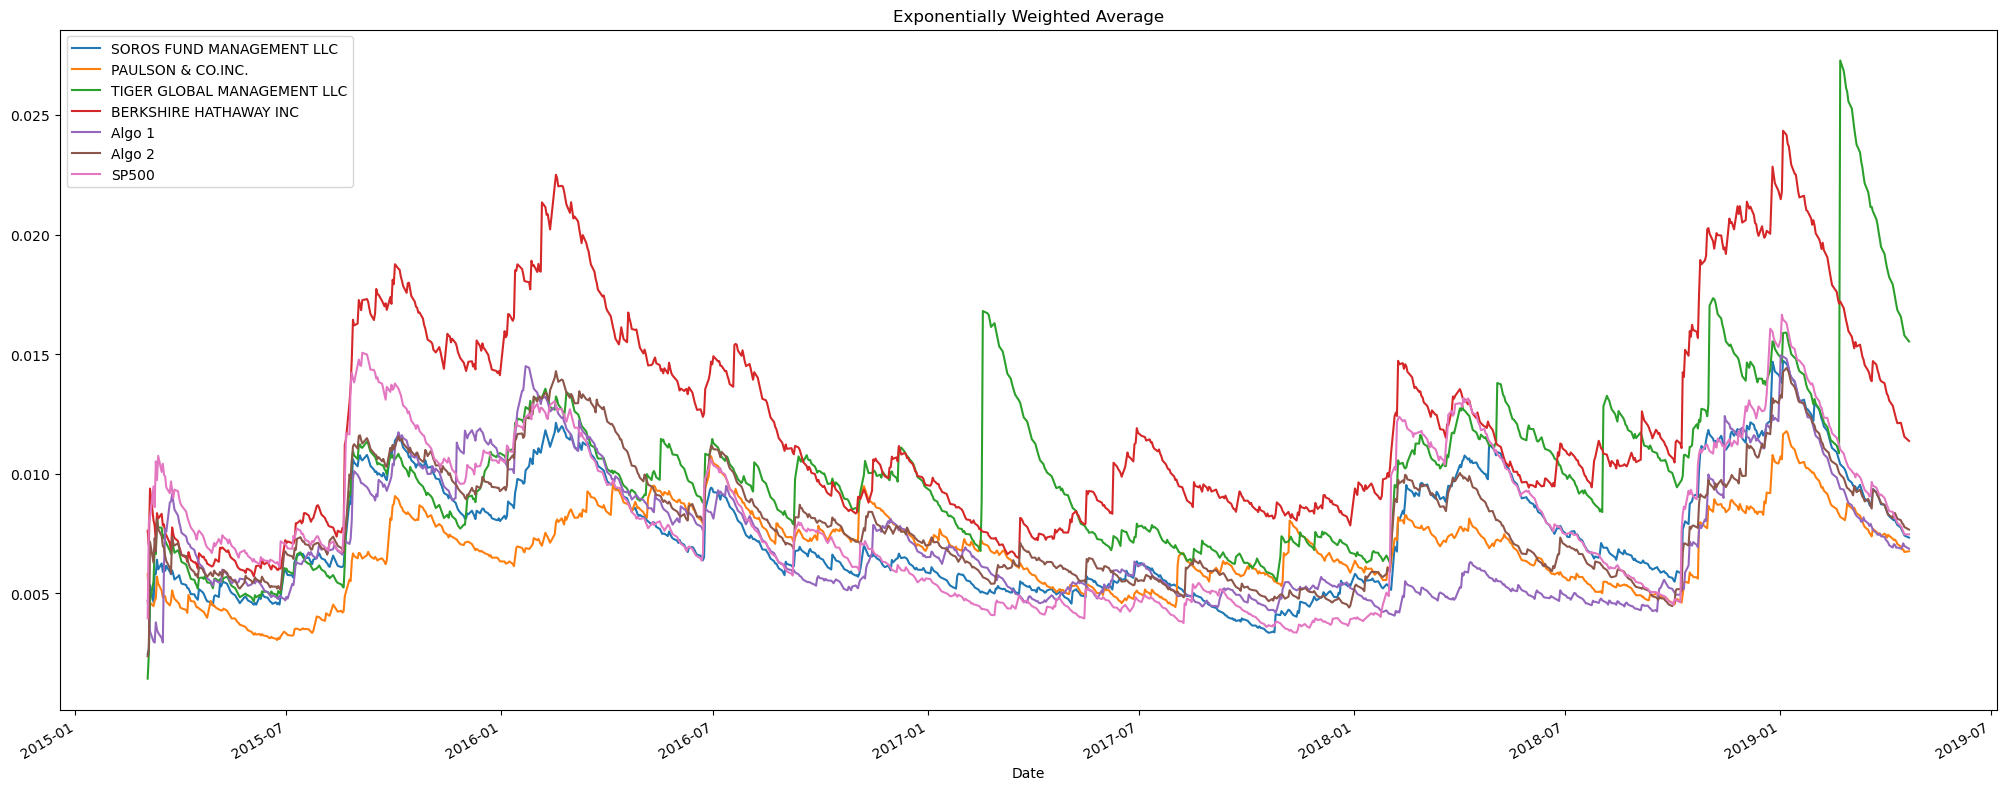

In [27]:
# Use `ewm` to calculate the rolling window

combined_data.ewm(halflife=21).std().plot(figsize=(25, 10), title="Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios

sharpe_ratio = (
    combined_data.mean() * 252 / (combined_data.std() * np.sqrt(252))
)

sharpe_ratio
    

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                         -0.518582
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

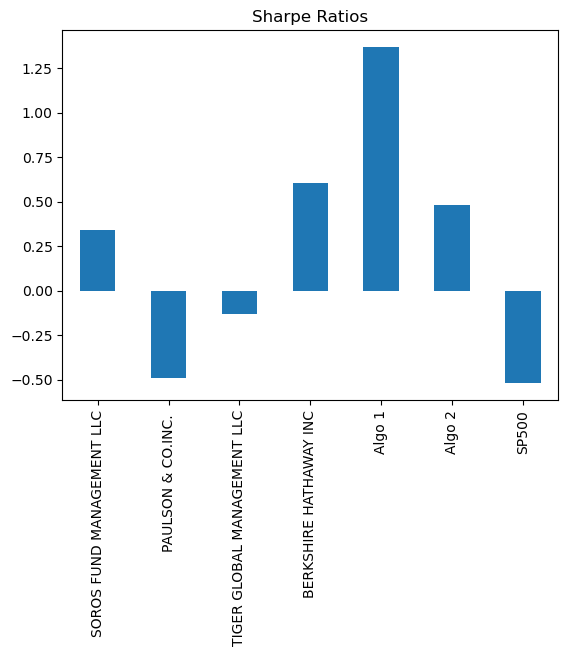

In [29]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratio.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Yes, the algorithimic strategies both outperformed the SP500. Of the whale portfolios, the Berkshire Hathaway portfolio outperformed Algo 2, but not Algo 1. This means that overall, Algo 1 performed the best and is generating 1.25 units of excess return for each unit of risk taken. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock

chip_path = Path("Resources/CMG.csv")
chip_df = pd.read_csv(chip_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)


In [31]:
# Reading data from 2nd stock

shop_path = Path("Resources/SHOP.csv")
shop_df = pd.read_csv(shop_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)


In [32]:
# Reading data from 3rd stock

spce_path = Path("Resources/SPCE.csv")
spce_df = pd.read_csv(spce_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)


In [33]:
# Combine all stocks in a single DataFrame

combined_stock_df = pd.concat([chip_df, shop_df, spce_df], axis="columns", join="inner")
combined_stock_df

,Ticker,Close,Ticker,Close,Ticker,Close
Date,,,,,,
2022-07-06,CMG,1342.33,SHOP,33.04,SPCE,6.45
2022-07-07,CMG,1351.24,SHOP,35.33,SPCE,7.23
2022-07-08,CMG,1339.28,SHOP,35.57,SPCE,7.32
2022-07-11,CMG,1290.09,SHOP,32.32,SPCE,6.59
2022-07-12,CMG,1261.46,SHOP,32.38,SPCE,6.93
...,...,...,...,...,...,...
2023-06-28,CMG,2101.49,SHOP,64.62,SPCE,4.74
2023-06-29,CMG,2110.60,SHOP,63.76,SPCE,4.23
2023-06-30,CMG,2139.00,SHOP,64.60,SPCE,3.88


In [34]:
# Reset Date index

# Worked with Tutor and said it was ok to remove this step

In [35]:
# Reorganize portfolio data by having a column per symbol

combined_stock_df.drop(columns=["Ticker"], inplace=True)
combined_stock_df

,Close,Close,Close
Date,,,
2022-07-06,1342.33,33.04,6.45
2022-07-07,1351.24,35.33,7.23
2022-07-08,1339.28,35.57,7.32
2022-07-11,1290.09,32.32,6.59
2022-07-12,1261.46,32.38,6.93
...,...,...,...
2023-06-28,2101.49,64.62,4.74
2023-06-29,2110.60,63.76,4.23
2023-06-30,2139.00,64.60,3.88


In [36]:
values = combined_stock_df.values
ticker_close_df = pd.DataFrame(values, columns = ["CMG", "SHOP", "SPCE"], index=combined_stock_df.index)
ticker_close_df

,CMG,SHOP,SPCE
Date,,,
2022-07-06,1342.33,33.04,6.45
2022-07-07,1351.24,35.33,7.23
2022-07-08,1339.28,35.57,7.32
2022-07-11,1290.09,32.32,6.59
2022-07-12,1261.46,32.38,6.93
...,...,...,...
2023-06-28,2101.49,64.62,4.74
2023-06-29,2110.60,63.76,4.23
2023-06-30,2139.00,64.60,3.88


In [37]:
# Calculate daily returns

daily_returns = ticker_close_df.pct_change()

# Drop NAs

daily_returns.dropna(inplace=True)

# Display sample data

daily_returns.head()

,CMG,SHOP,SPCE
Date,,,
2022-07-07,0.006638,0.069310,0.120930
2022-07-08,-0.008851,0.006793,0.012448
2022-07-11,-0.036729,-0.091369,-0.099727
2022-07-12,-0.022192,0.001856,0.051593
2022-07-13,0.011185,-0.007103,0.002886


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

portfolio_returns = daily_returns.dot(weights)

# Display sample data

portfolio_returns.head()

Date
2022-07-07    0.065626
2022-07-08    0.003463
2022-07-11   -0.075942
2022-07-12    0.010419
2022-07-13    0.002323
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame

all_returns = pd.concat([daily_returns, portfolio_returns], axis="columns", join="inner")
all_returns.rename(columns={0 : "Portfolio"}, inplace=True)
all_returns

,CMG,SHOP,SPCE,Portfolio
Date,,,,
2022-07-07,0.006638,0.069310,0.120930,0.065626
2022-07-08,-0.008851,0.006793,0.012448,0.003463
2022-07-11,-0.036729,-0.091369,-0.099727,-0.075942
2022-07-12,-0.022192,0.001856,0.051593,0.010419
2022-07-13,0.011185,-0.007103,0.002886,0.002323
...,...,...,...,...
2023-06-28,0.016819,0.012853,0.092166,0.040612
2023-06-29,0.004335,-0.013309,-0.107595,-0.038856
2023-06-30,0.013456,0.013174,-0.082742,-0.018704


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

all_returns.dropna(inplace=True)
all_returns

,CMG,SHOP,SPCE,Portfolio
Date,,,,
2022-07-07,0.006638,0.069310,0.120930,0.065626
2022-07-08,-0.008851,0.006793,0.012448,0.003463
2022-07-11,-0.036729,-0.091369,-0.099727,-0.075942
2022-07-12,-0.022192,0.001856,0.051593,0.010419
2022-07-13,0.011185,-0.007103,0.002886,0.002323
...,...,...,...,...
2023-06-28,0.016819,0.012853,0.092166,0.040612
2023-06-29,0.004335,-0.013309,-0.107595,-0.038856
2023-06-30,0.013456,0.013174,-0.082742,-0.018704


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the daily `std`

combined_daily_std = all_returns.std()
combined_daily_std

CMG          0.020526
SHOP         0.046158
SPCE         0.055819
Portfolio    0.032131
dtype: float64

In [42]:
# Calculate the annualized `std`

annualized_portfolio_std = combined_daily_std * np.sqrt(252)
annualized_portfolio_std


CMG          0.325833
SHOP         0.732742
SPCE         0.886102
Portfolio    0.510066
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

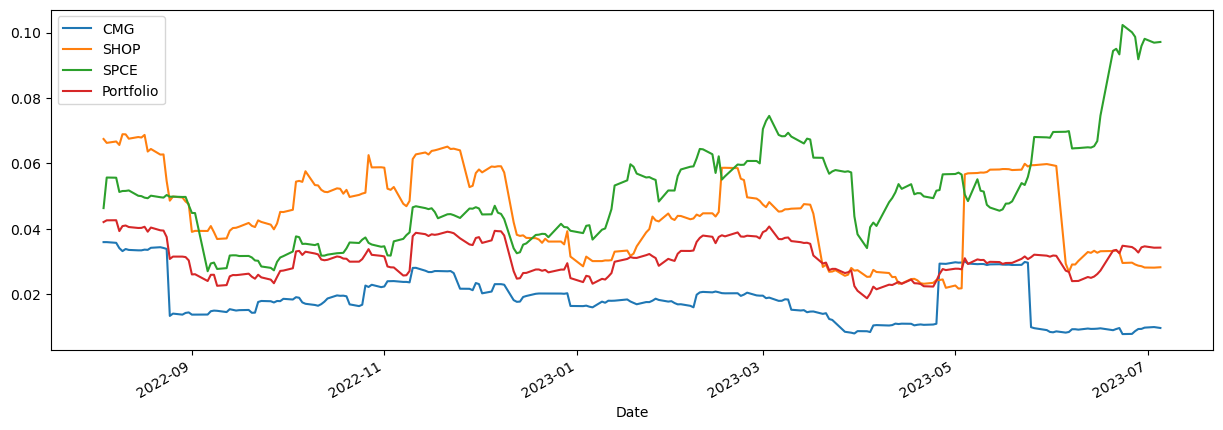

In [43]:
# Calculate rolling standard deviation

# Plot rolling standard deviation

all_returns.rolling(window=21).std().plot(figsize =(15,5))


### Calculate and plot the correlation

In [44]:
# Calculate and plot the correlation

correlation = all_returns.corr()
correlation

,CMG,SHOP,SPCE,Portfolio
CMG,1.000000,0.456125,0.345198,0.631249
SHOP,0.456125,1.000000,0.382049,0.797215
SPCE,0.345198,0.382049,1.000000,0.835528
Portfolio,0.631249,0.797215,0.835528,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [45]:
# Read in new SP500 data

sp_500_new_path = Path("Resources/SP500.csv")
sp_500_new = pd.read_csv(sp_500_new_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)


In [46]:
# Calculate % Change for SP500 + drop nulls

sp_new_returns = sp_500_new.pct_change()
sp_new_returns

,SP500
Date,
2022-07-06,NaN
2022-07-07,0.014965
2022-07-08,-0.000830
2022-07-11,-0.011527
2022-07-12,-0.009244
...,...
2023-06-28,-0.000354
2023-06-29,0.004474
2023-06-30,0.012269


In [47]:
sp_new_returns.dropna(inplace=True)
sp_new_returns.head()

,SP500
Date,
2022-07-07,0.014965
2022-07-08,-0.000830
2022-07-11,-0.011527
2022-07-12,-0.009244
2022-07-13,-0.004457


<Axes: title={'center': 'Rolling 60-Day Beta Trend'}, xlabel='Date'>

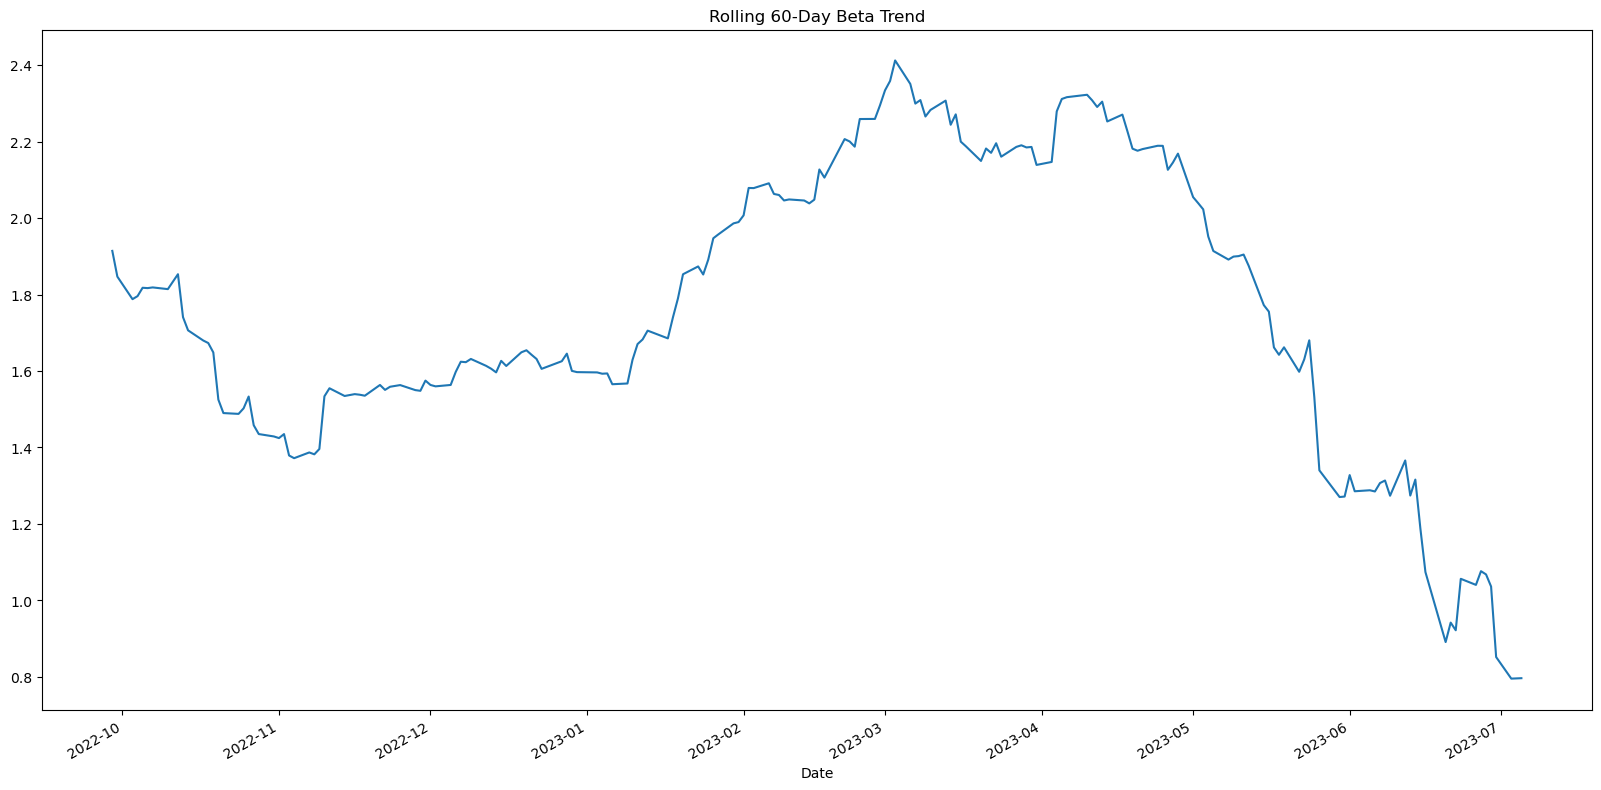

In [48]:
# Calculate and plot Beta
rolling_covariance_new = all_returns["Portfolio"].rolling(window=60).cov(sp_new_returns["SP500"])
rolling_variance_new = sp_new_returns["SP500"].rolling(window=60).var()
rolling_beta_new = rolling_covariance_new / rolling_variance_new

rolling_beta_new.plot(figsize=(20, 10), title= "Rolling 60-Day Beta Trend")

In [49]:
# Add new SP500 to portfolio data

total_combined_data = pd.concat([all_returns, sp_new_returns], axis="columns", join="inner")
total_combined_data.head()

,CMG,SHOP,SPCE,Portfolio,SP500
Date,,,,,
2022-07-07,0.006638,0.069310,0.120930,0.065626,0.014965
2022-07-08,-0.008851,0.006793,0.012448,0.003463,-0.000830
2022-07-11,-0.036729,-0.091369,-0.099727,-0.075942,-0.011527
2022-07-12,-0.022192,0.001856,0.051593,0.010419,-0.009244
2022-07-13,0.011185,-0.007103,0.002886,0.002323,-0.004457


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [50]:
# Calculate Annualized Sharpe Ratios

sharpe_ratio_new = (
  total_combined_data.mean() * 252 / (total_combined_data.std() * np.sqrt(252))
)

sharpe_ratio_new

CMG          1.574012
SHOP         1.275737
SPCE        -0.127393
Portfolio    0.872285
SP500        0.851759
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

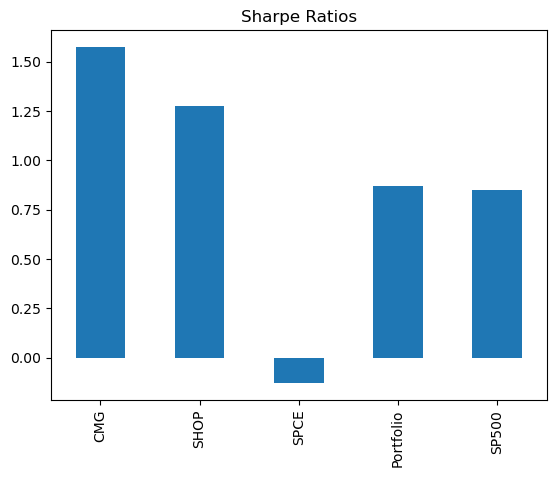

In [51]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratio_new.plot.bar(title='Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [52]:
# My portfolio just barely outperformed the market with he given weights. The high sharp ratios and low stds by Chipotle and Shopify carried my portfolio to outperform the SP500. Space was extremely volatile and risky with a high std, which pulled down my overall portfolio.